No Preprocessing

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import tensorflow.keras

C:\Users\ASUS\AppData\Roaming\Python\Python310\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
df=pd.read_csv(r"C:\Users\ASUS\Downloads\IOT Datasets\IoT_Intrusion.csv")

In [3]:
df.head()

,flow_duration,Header_Length,Protocol Type,Duration,Rate,Srate,Drate,fin_flag_number,syn_flag_number,rst_flag_number,...,Std,Tot size,IAT,Number,Magnitue,Radius,Covariance,Variance,Weight,label
0,0.000000,54.00,6.00,64.00,0.329807,0.329807,0.0,1,0,1,...,0.000000,54.00,83343831.92,9.5,10.392305,0.000000,0.000000,0.00,141.55,DDoS-RSTFINFlood
1,0.000000,57.04,6.33,64.00,4.290556,4.290556,0.0,0,0,0,...,2.822973,57.04,82926067.47,9.5,10.464666,4.010353,160.987842,0.05,141.55,DoS-TCP_Flood
2,0.000000,0.00,1.00,64.00,33.396799,33.396799,0.0,0,0,0,...,0.000000,42.00,83127993.93,9.5,9.165151,0.000000,0.000000,0.00,141.55,DDoS-ICMP_Flood
3,0.328175,76175.00,17.00,64.00,4642.133010,4642.133010,0.0,0,0,0,...,0.000000,50.00,83015696.38,9.5,10.000000,0.000000,0.000000,0.00,141.55,DoS-UDP_Flood
4,0.117320,101.73,6.11,65.91,6.202211,6.202211,0.0,0,1,0,...,23.113111,57.88,82972999.18,9.5,11.346876,32.716243,3016.808286,0.19,141.55,DoS-SYN_Flood


In [4]:
labels=df['label'].value_counts()

In [5]:
df.columns

Index(['flow_duration', 'Header_Length', 'Protocol Type', 'Duration', 'Rate',
       'Srate', 'Drate', 'fin_flag_number', 'syn_flag_number',
       'rst_flag_number', 'psh_flag_number', 'ack_flag_number',
       'ece_flag_number', 'cwr_flag_number', 'ack_count', 'syn_count',
       'fin_count', 'urg_count', 'rst_count', 'HTTP', 'HTTPS', 'DNS', 'Telnet',
       'SMTP', 'SSH', 'IRC', 'TCP', 'UDP', 'DHCP', 'ARP', 'ICMP', 'IPv', 'LLC',
       'Tot sum', 'Min', 'Max', 'AVG', 'Std', 'Tot size', 'IAT', 'Number',
       'Magnitue', 'Radius', 'Covariance', 'Variance', 'Weight', 'label'],
      dtype='object')

In [6]:
len(df.columns)

47

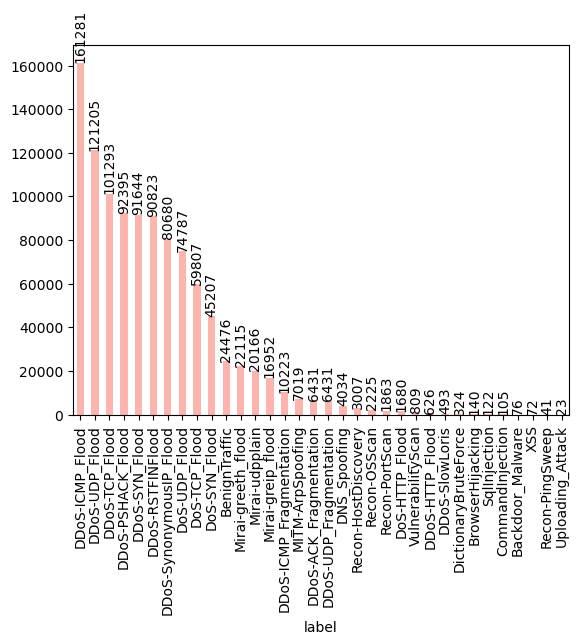

In [7]:
ax=labels.plot(kind='bar',cmap='Pastel1')
for bars in ax.containers:
    ax.bar_label(bars,rotation=90)

In [8]:
from sklearn.preprocessing import LabelEncoder

In [9]:
len(labels)

34

In [10]:
valid_labels=labels[labels>1000]

In [11]:
valid_labels

label
DDoS-ICMP_Flood            161281
DDoS-UDP_Flood             121205
DDoS-TCP_Flood             101293
DDoS-PSHACK_Flood           92395
DDoS-SYN_Flood              91644
DDoS-RSTFINFlood            90823
DDoS-SynonymousIP_Flood     80680
DoS-UDP_Flood               74787
DoS-TCP_Flood               59807
DoS-SYN_Flood               45207
BenignTraffic               24476
Mirai-greeth_flood          22115
Mirai-udpplain              20166
Mirai-greip_flood           16952
DDoS-ICMP_Fragmentation     10223
MITM-ArpSpoofing             7019
DDoS-ACK_Fragmentation       6431
DDoS-UDP_Fragmentation       6431
DNS_Spoofing                 4034
Recon-HostDiscovery          3007
Recon-OSScan                 2225
Recon-PortScan               1863
DoS-HTTP_Flood               1680
Name: count, dtype: int64

In [13]:
vl=valid_labels.index

In [14]:
df=df[df['label'].isin(vl)]

In [15]:
df.shape

(1045744, 47)

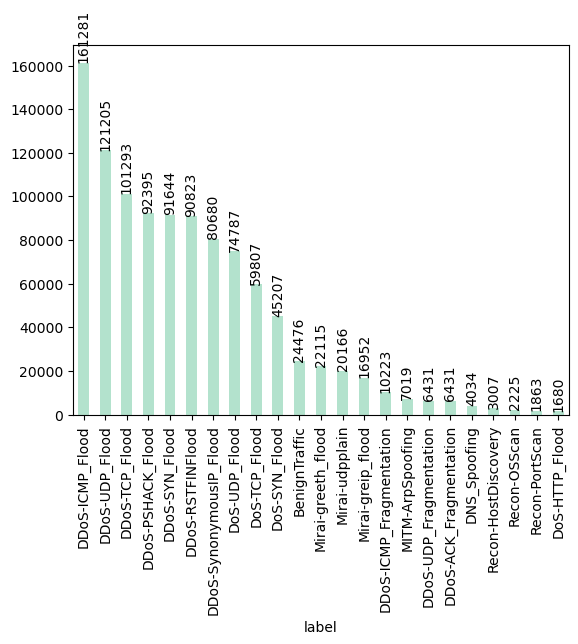

In [18]:
ax=df['label'].value_counts().plot(kind='bar',cmap='Pastel2')
for bars in ax.containers:
    ax.bar_label(bars,rotation=90)

In [19]:
df=df.sample(50000)

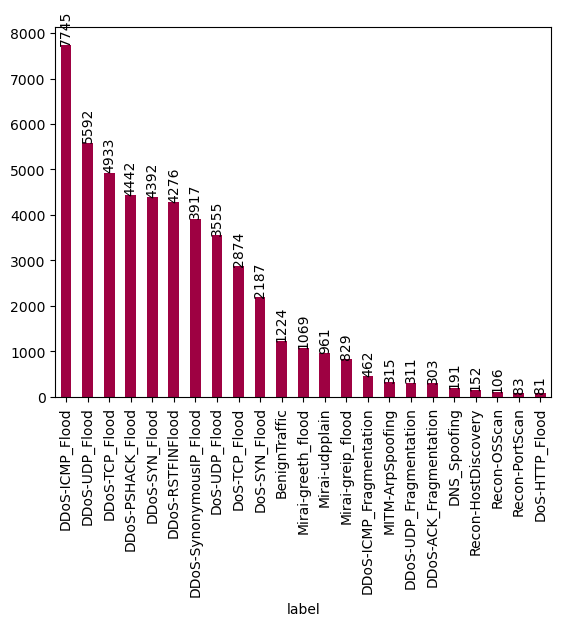

In [21]:
ax=df['label'].value_counts().plot(kind='bar',cmap='Spectral')
for bars in ax.containers:
    ax.bar_label(bars,rotation=90)

In [22]:
l=LabelEncoder()

In [23]:
df['label']=l.fit_transform(df['label'])

In [24]:
df.head()

,flow_duration,Header_Length,Protocol Type,Duration,Rate,Srate,Drate,fin_flag_number,syn_flag_number,rst_flag_number,...,Std,Tot size,IAT,Number,Magnitue,Radius,Covariance,Variance,Weight,label
527003,3.173616,108.00,6.00,64.00,0.630196,0.630196,0.0,0,0,0,...,0.000000,54.00,8.294659e+07,9.5,10.392305,0.000000,0.000000e+00,0.00,141.55,14
558883,0.000000,53.46,5.94,63.36,0.967689,0.967689,0.0,0,0,0,...,0.040218,54.06,8.306759e+07,9.5,10.393232,0.057331,5.478917e-02,0.03,141.55,8
789082,0.023984,196.24,6.00,65.74,22.174997,22.174997,0.0,0,1,0,...,5.349866,55.60,8.309005e+07,9.5,10.543288,7.577963,1.388721e+02,0.23,141.55,6
697500,0.399703,371615.00,6.00,55.60,701.767299,701.767299,0.0,0,0,0,...,2025.731726,1678.00,1.668630e+08,13.5,62.677713,2871.199791,4.128419e+06,1.00,244.60,11
217485,0.210070,31599.00,17.00,64.00,7474.930557,7474.930557,0.0,0,0,0,...,0.000000,50.00,8.312389e+07,9.5,10.000000,0.000000,0.000000e+00,0.00,141.55,9


In [25]:
l.classes_

array(['BenignTraffic', 'DDoS-ACK_Fragmentation', 'DDoS-ICMP_Flood',
       'DDoS-ICMP_Fragmentation', 'DDoS-PSHACK_Flood', 'DDoS-RSTFINFlood',
       'DDoS-SYN_Flood', 'DDoS-SynonymousIP_Flood', 'DDoS-TCP_Flood',
       'DDoS-UDP_Flood', 'DDoS-UDP_Fragmentation', 'DNS_Spoofing',
       'DoS-HTTP_Flood', 'DoS-SYN_Flood', 'DoS-TCP_Flood',
       'DoS-UDP_Flood', 'MITM-ArpSpoofing', 'Mirai-greeth_flood',
       'Mirai-greip_flood', 'Mirai-udpplain', 'Recon-HostDiscovery',
       'Recon-OSScan', 'Recon-PortScan'], dtype=object)

In [26]:
l.transform(l.classes_)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22])

In [27]:
dict_labels=dict(zip(l.classes_,l.transform(l.classes_)))

In [28]:
dict_labels

{'BenignTraffic': 0,
 'DDoS-ACK_Fragmentation': 1,
 'DDoS-ICMP_Flood': 2,
 'DDoS-ICMP_Fragmentation': 3,
 'DDoS-PSHACK_Flood': 4,
 'DDoS-RSTFINFlood': 5,
 'DDoS-SYN_Flood': 6,
 'DDoS-SynonymousIP_Flood': 7,
 'DDoS-TCP_Flood': 8,
 'DDoS-UDP_Flood': 9,
 'DDoS-UDP_Fragmentation': 10,
 'DNS_Spoofing': 11,
 'DoS-HTTP_Flood': 12,
 'DoS-SYN_Flood': 13,
 'DoS-TCP_Flood': 14,
 'DoS-UDP_Flood': 15,
 'MITM-ArpSpoofing': 16,
 'Mirai-greeth_flood': 17,
 'Mirai-greip_flood': 18,
 'Mirai-udpplain': 19,
 'Recon-HostDiscovery': 20,
 'Recon-OSScan': 21,
 'Recon-PortScan': 22}

Basic Model Without Preprocessing 

In [29]:
from xgboost import XGBClassifier
from mlxtend.plotting import plot_decision_regions
from sklearn.decomposition import PCA

In [30]:
x=XGBClassifier()

In [31]:
from sklearn.model_selection import GridSearchCV,train_test_split

In [32]:
params={'n_estimators':[1,10,20,50,100,120,150,200],'learning_rate':[0.1,0.01,0.001,0.0001,0.5,0.25,0.3],'max_depth':[1,10,12,15,None]}

In [33]:
g=GridSearchCV(x,param_grid=params,cv=10,n_jobs=-1,scoring='accuracy')

In [34]:
g

GridSearchCV(cv=10,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             n_jobs=-1,
             param_grid={'learning_rate': [0.1, 0.01, 0.001, 0.0001, 0.5, 0.25,
                                           0.3],
                         'max_depth': [1, 10, 12, 15, None],
                         'n_estimators': [1, 10, 20, 50, 100, 120, 150, 200]},
             scoring='accuracy')

In [35]:
X=df.drop(columns='label')
y=df['label']

In [36]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42,test_size=0.2)

In [37]:
g.fit(X_train,y_train)

GridSearchCV(cv=10,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             n_jobs=-1,
             param_grid={'learning_rate': [0.1, 0.01, 0.001, 0.0001, 0.5, 0.25,
                                           0.3],
                         'max_depth': [1, 10, 12, 15, None],
                         'n_estimators': [1, 10, 20, 50, 100, 120, 150, 200]},
             scoring='accuracy')

In [39]:
g.best_params_

{'learning_rate': 0.5, 'max_depth': None, 'n_estimators': 100}

In [40]:
g.best_score_

0.992

In [41]:
from xgboost import plot_importance

In [48]:
xg=XGBClassifier(learning_rate=0.5,max_depth=None,n_estimators=100)

In [49]:
xg

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.5, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [51]:
xg.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.5, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

<Figure size 5000x5000 with 0 Axes>

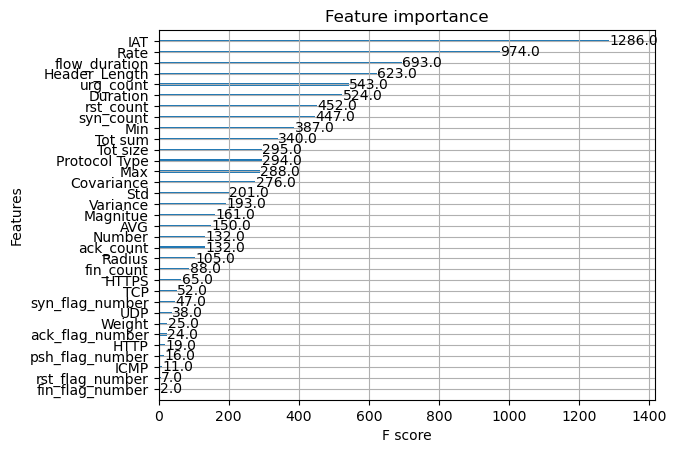

In [53]:
plot_importance(xg)

In [54]:
y_pred=xg.predict(X_test)

In [55]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,classification_report,confusion_matrix,ConfusionMatrixDisplay

In [56]:
report=classification_report(y_test,y_pred)

In [57]:
report

'              precision    recall  f1-score   support\n\n           0       0.88      0.95      0.91       259\n           1       1.00      1.00      1.00        56\n           2       1.00      1.00      1.00      1550\n           3       1.00      0.99      0.99        87\n           4       1.00      1.00      1.00       884\n           5       1.00      1.00      1.00       827\n           6       1.00      1.00      1.00       903\n           7       1.00      1.00      1.00       733\n           8       1.00      1.00      1.00      1026\n           9       1.00      1.00      1.00      1161\n          10       0.97      1.00      0.98        61\n          11       0.58      0.55      0.57        38\n          12       1.00      1.00      1.00        21\n          13       1.00      1.00      1.00       442\n          14       1.00      1.00      1.00       587\n          15       1.00      1.00      1.00       660\n          16       0.75      0.73      0.74        52\n       

In [58]:
cm=confusion_matrix(y_test,y_pred)

<Figure size 5000x5000 with 0 Axes>

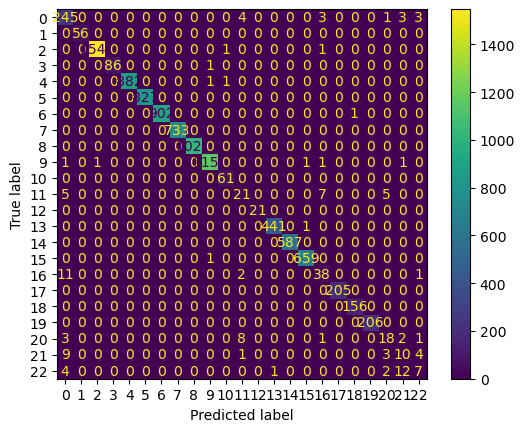

In [61]:
plt.figure(figsize=(50,50))
ConfusionMatrixDisplay(cm).plot()

In [60]:
a=accuracy_score(y_test,y_pred)

In [85]:
pr=precision_score(y_test,y_pred,average='micro')

In [65]:
r=recall_score(y_test,y_pred,average='micro')

In [67]:
f=f1_score(y_test,y_pred,average='micro')

In [68]:
p=PCA(n_components=2)
X_train_pca=p.fit_transform(X_train)
X_test_pca=p.transform(X_test)

In [69]:
xgb=XGBClassifier(**g.best_params_)

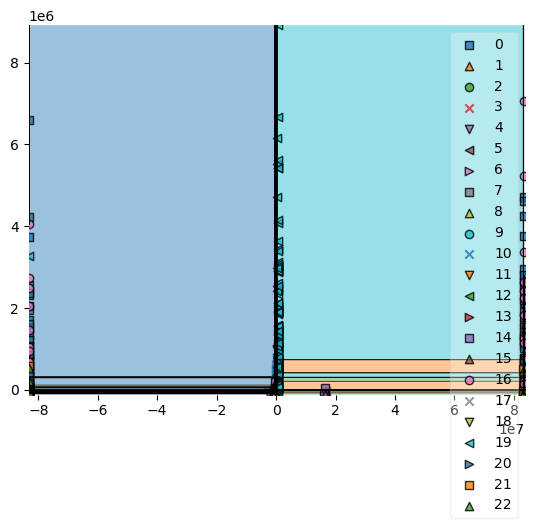

In [78]:
from PIL import Image
xgb.fit(np.array(X_train_pca),np.array(y_train))
plot_decision_regions(np.array(X_train_pca[:5000,:]),np.array(y_train[:5000]),xgb)
path='E:\Courses\Optical Character Recognition\Images\pdr.png'
plt.savefig(path)
img=Image.open(path)

In [80]:
import mlflow
from mlflow.models.signature import infer_signature

In [87]:
ip=X_train.sample(1000)
mlflow.set_experiment('IOT_Intrusion_Model_1')
with mlflow.start_run():
    mlflow.log_param('Best Parameters',g.best_params_)
    #mlflow.log_metric('Classification Report',report)
    #mlflow.log_metric('Confusion Matrix',cm)
    mlflow.log_metric('Accuracy Score',a)
    mlflow.log_metric('Precision Score',pr)
    mlflow.log_metric('Recall Score',r)
    mlflow.log_metric('F1 Score',f)
    mlflow.log_image(img,'Decision_Regions.png')
    sig=infer_signature(X_test,y_pred)
    mlflow.sklearn.log_model(sk_model=xg,signature=sig,registered_model_name='IOT_Intrusion',input_example=ip,artifact_path='XGBClassifier')

C:\Users\ASUS\AppData\Roaming\Python\Python310\site-packages\mlflow\types\utils.py:393: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details.
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\_distutils_hack\__init__.py:33: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")
Successfully registered model 'IOT_Intrusion'.
Crea